# UK Car Accidents 2005-2015

In [1]:
import os

In [2]:
os.getcwd()

'/Users/sabina/Documents/2022/CEU MSBA Winter 2022/Coding 3 - Python/Final Project/accidents_python-project-main/code'

In [3]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [4]:
#load the datasets
accidents_raw = pd.read_csv('/Users/sabina/Documents/2022/project/data/raw/Accidents0515.csv')
casualties_raw = pd.read_csv('/Users/sabina/Documents/2022/project/data/raw/Casualties0515.csv',on_bad_lines='skip')

## Accidents dataset

#### Quick look at the data:

In [18]:
nRow, nCol = accidents_raw.shape
print(f'There are {nRow} rows and {nCol} columns.')

There are 1780653 rows and 32 columns.


In [20]:
accidents_raw.head(10)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,0,1,1,2,2,0,0,1,1,E01002849
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,0,5,4,1,1,0,0,1,1,E01002909
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,0,0,4,1,1,0,0,1,1,E01002857
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,0,0,1,1,1,0,0,1,1,E01002840
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,0,0,7,1,2,0,0,1,1,E01002863
5,200501BS00006,524770.0,181160.0,-0.203238,51.515540,1,3,2,1,11/01/2005,...,0,0,1,2,2,6,0,1,1,E01002832
6,200501BS00007,524220.0,180830.0,-0.211277,51.512695,1,3,2,1,13/01/2005,...,0,0,4,1,1,0,0,1,1,E01002875
7,200501BS00009,525890.0,179710.0,-0.187623,51.502260,1,3,1,2,14/01/2005,...,0,0,1,1,1,0,0,1,1,E01002889
8,200501BS00010,527350.0,177650.0,-0.167342,51.483420,1,3,2,2,15/01/2005,...,0,5,4,1,1,0,0,1,1,E01002900
9,200501BS00011,524550.0,180810.0,-0.206531,51.512443,1,3,2,5,15/01/2005,...,0,8,1,1,1,0,0,1,1,E01002875


In [5]:
#info attribute gives info about dataframe
accidents_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1780653 entries, 0 to 1780652
Data columns (total 32 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   Accident_Index                               object 
 1   Location_Easting_OSGR                        float64
 2   Location_Northing_OSGR                       float64
 3   Longitude                                    float64
 4   Latitude                                     float64
 5   Police_Force                                 int64  
 6   Accident_Severity                            int64  
 7   Number_of_Vehicles                           int64  
 8   Number_of_Casualties                         int64  
 9   Date                                         object 
 10  Day_of_Week                                  int64  
 11  Time                                         object 
 12  Local_Authority_(District)                   int64  
 13  Local_Author

In [6]:
#summary stats
accidents_raw.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
count,1.780515e+06,1.780515e+06,1.780515e+06,1.780515e+06,1.780653e+06,1.780653e+06,1.780653e+06,1.780653e+06,1.780653e+06,1.780653e+06,...,1.780653e+06,1.780653e+06,1.780653e+06,1.780653e+06,1.780653e+06,1.780653e+06,1.780653e+06,1.780653e+06,1.780653e+06,1.780653e+06
mean,4.401799e+05,2.985128e+05,-1.428579e+00,5.257450e+01,3.075348e+01,2.838219e+00,1.832064e+00,1.349454e+00,4.115302e+00,3.532614e+02,...,3.782832e+02,9.261209e-03,7.375014e-01,1.950535e+00,1.575724e+00,1.358392e+00,1.090639e-01,7.219374e-02,1.356260e+00,1.193455e+00
std,9.547599e+04,1.612254e+05,1.403495e+00,1.451753e+00,2.551787e+01,4.017948e-01,7.148732e-01,8.237479e-01,1.923763e+00,2.593133e+02,...,1.297375e+03,1.276795e-01,1.818855e+00,1.648467e+00,1.642447e+00,6.243018e-01,7.304625e-01,6.193070e-01,4.790610e-01,4.011830e-01
min,6.495000e+04,1.029000e+04,-7.516225e+00,4.991294e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,-1.000000e+00
25%,3.764000e+05,1.779900e+05,-2.354786e+00,5.148769e+01,7.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.220000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
50%,4.413200e+05,2.649500e+05,-1.386472e+00,5.227209e+01,3.100000e+01,3.000000e+00,2.000000e+00,1.000000e+00,4.000000e+00,3.280000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
75%,5.234235e+05,3.965700e+05,-2.164865e-01,5.346409e+01,4.600000e+01,3.000000e+00,2.000000e+00,1.000000e+00,6.000000e+00,5.310000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00
max,6.555400e+05,1.208800e+06,1.762010e+00,6.075754e+01,9.800000e+01,3.000000e+00,6.700000e+01,9.300000e+01,7.000000e+00,9.410000e+02,...,9.999000e+03,2.000000e+00,8.000000e+00,7.000000e+00,9.000000e+00,5.000000e+00,7.000000e+00,7.000000e+00,3.000000e+00,3.000000e+00


In [7]:
#column names
accidents_raw.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')

In [27]:
accidents_raw.isnull().sum()

Accident_Index                                      0
Location_Easting_OSGR                             138
Location_Northing_OSGR                            138
Longitude                                         138
Latitude                                          138
Police_Force                                        0
Accident_Severity                                   0
Number_of_Vehicles                                  0
Number_of_Casualties                                0
Date                                                0
Day_of_Week                                         0
Time                                              151
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
1st_Road_Class                                      0
1st_Road_Number                                     0
Road_Type                                           0
Speed_limit                                         0
Junction_Detail             

In [28]:
#drop na

accidents = accidents_raw.dropna()

In [29]:
accidents.isnull().sum()

Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                0
Junction_Control                               0
2nd_Road_Class      

<AxesSubplot:>

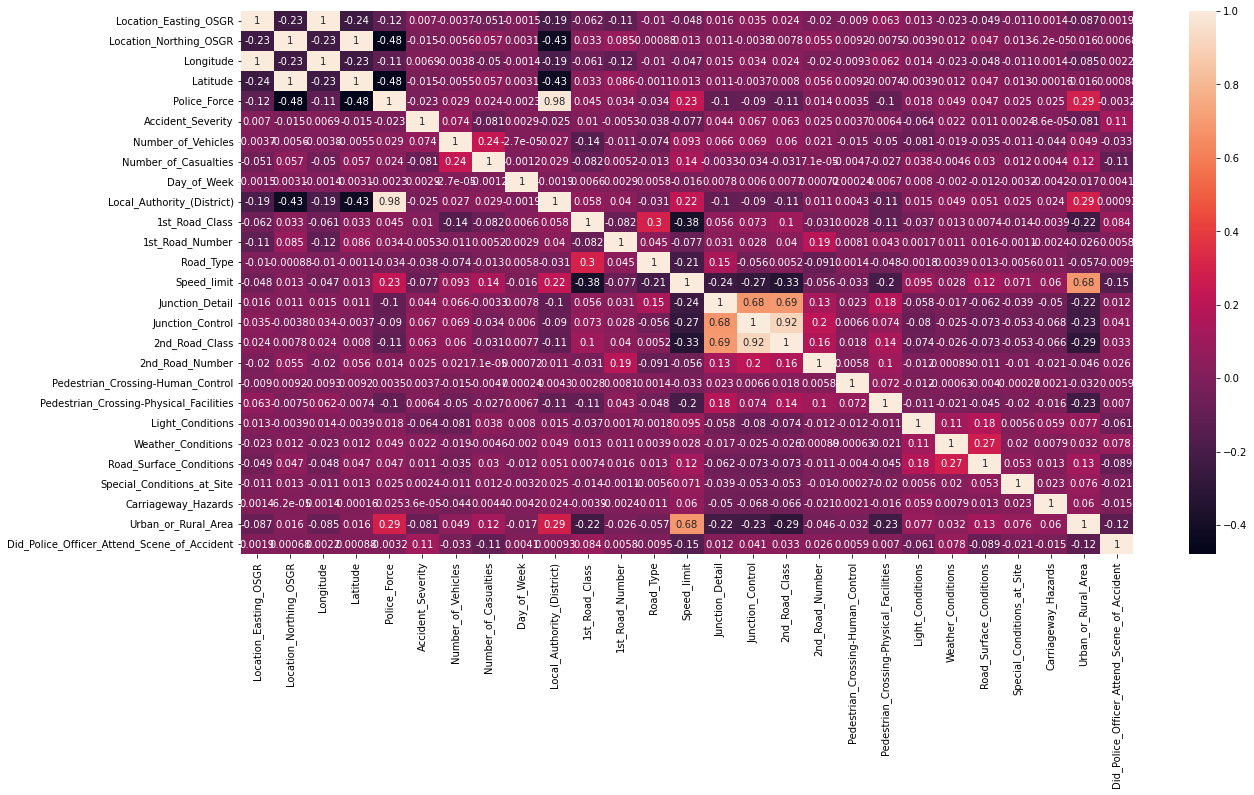

In [37]:
#correlation 

accidents_corr = accidents.corr()
plt.figure(figsize=(20,10))
sns.heatmap(accidents_corr, annot=True)

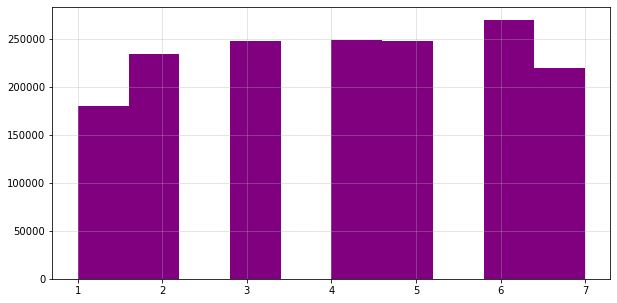

In [41]:
#Distribution of accidents based on dayweek:

plt.figure(figsize=(10,5))
accidents['Day_of_Week'].hist(color='purple')
plt.grid(alpha=0.4)

/Users/sabina/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


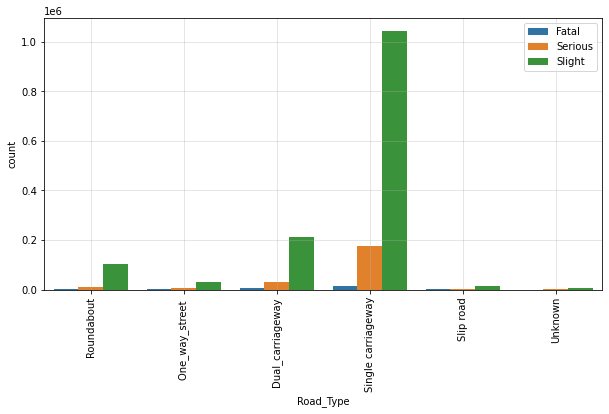

In [42]:
#Distribution of accidents based on road type:

plt.figure(figsize=(10,5))
ax=sns.countplot('Road_Type',hue='Accident_Severity',data=accidents)
ax.set_xticklabels(['Roundabout','One_way_street ','Dual_carriageway','Single carriageway','Slip road','Unknown'])
plt.xticks(rotation=90)
plt.legend(['Fatal','Serious','Slight'])
plt.grid(alpha=0.4)

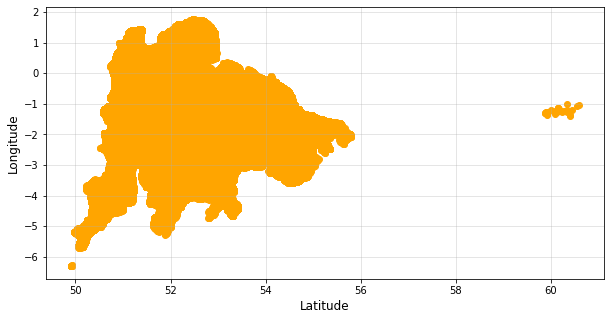

In [43]:
#Map - Scatter plot of Longitude/Latitude

plt.figure(figsize=(10,5))
plt.scatter(x='Latitude',y='Longitude',data=accidents,c='orange')
plt.xlabel('Latitude',fontsize=12)
plt.ylabel('Longitude',fontsize=12)
plt.grid(alpha=0.4)

/Users/sabina/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/var/folders/lc/3yknv_8x5832sztwzg33_tcw0000gn/T/ipykernel_3167/1210041177.py:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.xticks(Rotation=90)


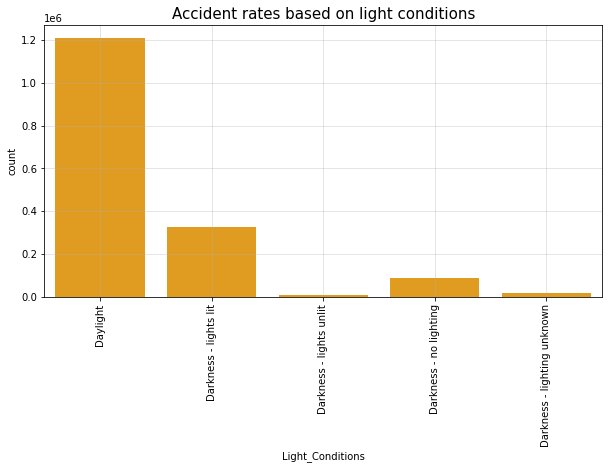

In [50]:
#Distribution of accidents based on light conditions

plt.figure(figsize=(10,5))
ax=sns.countplot('Light_Conditions',data=accidents,color='orange') 
ax.set_xticklabels(['Daylight','Darkness - lights lit',
                    'Darkness - lights unlit','Darkness - no lighting','Darkness - lighting unknown'])
plt.xticks(Rotation=90)
plt.title('Accident rates based on light conditions',fontsize=15)
plt.grid(alpha=0.4)
plt.show()

## Casualties dataset

#### Quick look at the data:

In [17]:
nRow, nCol = casualties_raw.shape
print(f'There are {nRow} rows and {nCol} columns.')

There are 2216720 rows and 15 columns.


In [21]:
casualties_raw.head(10)

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
0,200501BS00001,1,1,3,1,37,7,2,1,1,0,0,-1,0,1
1,200501BS00002,1,1,2,1,37,7,3,0,0,0,4,-1,11,1
2,200501BS00003,2,1,1,1,62,9,3,0,0,0,0,-1,9,1
3,200501BS00004,1,1,3,1,30,6,3,5,2,0,0,-1,0,1
4,200501BS00005,1,1,1,1,49,8,3,0,0,0,0,-1,3,-1
5,200501BS00006,2,1,1,2,30,6,3,0,0,0,0,-1,3,1
6,200501BS00007,1,1,1,1,31,6,3,0,0,0,0,-1,3,-1
7,200501BS00009,1,1,3,2,13,3,3,6,9,0,0,-1,0,1
8,200501BS00009,1,2,3,2,13,3,3,6,9,0,0,-1,0,1
9,200501BS00010,1,1,1,1,35,6,3,0,0,0,0,-1,9,1


In [9]:
#info attribute gives info about dataframe
casualties_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216720 entries, 0 to 2216719
Data columns (total 15 columns):
 #   Column                              Dtype 
---  ------                              ----- 
 0   Accident_Index                      object
 1   Vehicle_Reference                   int64 
 2   Casualty_Reference                  int64 
 3   Casualty_Class                      int64 
 4   Sex_of_Casualty                     int64 
 5   Age_of_Casualty                     int64 
 6   Age_Band_of_Casualty                int64 
 7   Casualty_Severity                   int64 
 8   Pedestrian_Location                 int64 
 9   Pedestrian_Movement                 int64 
 10  Car_Passenger                       int64 
 11  Bus_or_Coach_Passenger              int64 
 12  Pedestrian_Road_Maintenance_Worker  int64 
 13  Casualty_Type                       int64 
 14  Casualty_Home_Area_Type             int64 
dtypes: int64(14), object(1)
memory usage: 253.7+ MB


In [13]:
#summary stats
casualties_raw.describe()

,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
count,2.216720e+06,2.216720e+06,2.216720e+06,2.216720e+06,2.216720e+06,2.216720e+06,2.216720e+06,2.216720e+06,2.216720e+06,2.216720e+06,2.216720e+06,2.216720e+06,2.216720e+06,2.216720e+06
mean,1.485031e+00,1.433611e+00,1.493615e+00,1.416186e+00,3.435309e+01,6.020044e+00,2.866671e+00,6.663922e-01,4.740599e-01,2.828526e-01,9.074669e-02,-6.254159e-01,7.510757e+00,9.904936e-01
std,6.671878e-01,1.404250e+00,7.062961e-01,4.946520e-01,1.885804e+01,2.406346e+00,3.692819e-01,1.959742e+00,1.660281e+00,5.933772e-01,5.674798e-01,5.526900e-01,7.170375e+00,1.031795e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00
25%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+01,4.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,3.000000e+00,1.000000e+00
50%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.100000e+01,6.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,9.000000e+00,1.000000e+00
75%,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,4.600000e+01,8.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,1.000000e+00
max,9.100000e+01,8.520000e+02,3.000000e+00,2.000000e+00,1.030000e+02,1.100000e+01,3.000000e+00,1.000000e+01,9.000000e+00,2.000000e+00,4.000000e+00,2.000000e+00,9.800000e+01,3.000000e+00


In [31]:
#column names
casualties_raw.columns

Index(['Accident_Index', 'Vehicle_Reference', 'Casualty_Reference',
       'Casualty_Class', 'Sex_of_Casualty', 'Age_of_Casualty',
       'Age_Band_of_Casualty', 'Casualty_Severity', 'Pedestrian_Location',
       'Pedestrian_Movement', 'Car_Passenger', 'Bus_or_Coach_Passenger',
       'Pedestrian_Road_Maintenance_Worker', 'Casualty_Type',
       'Casualty_Home_Area_Type'],
      dtype='object')

In [32]:
casualties_raw.isnull().sum()

Accident_Index                        0
Vehicle_Reference                     0
Casualty_Reference                    0
Casualty_Class                        0
Sex_of_Casualty                       0
Age_of_Casualty                       0
Age_Band_of_Casualty                  0
Casualty_Severity                     0
Pedestrian_Location                   0
Pedestrian_Movement                   0
Car_Passenger                         0
Bus_or_Coach_Passenger                0
Pedestrian_Road_Maintenance_Worker    0
Casualty_Type                         0
Casualty_Home_Area_Type               0
dtype: int64

In [39]:
casualties = casualties_raw

<AxesSubplot:>

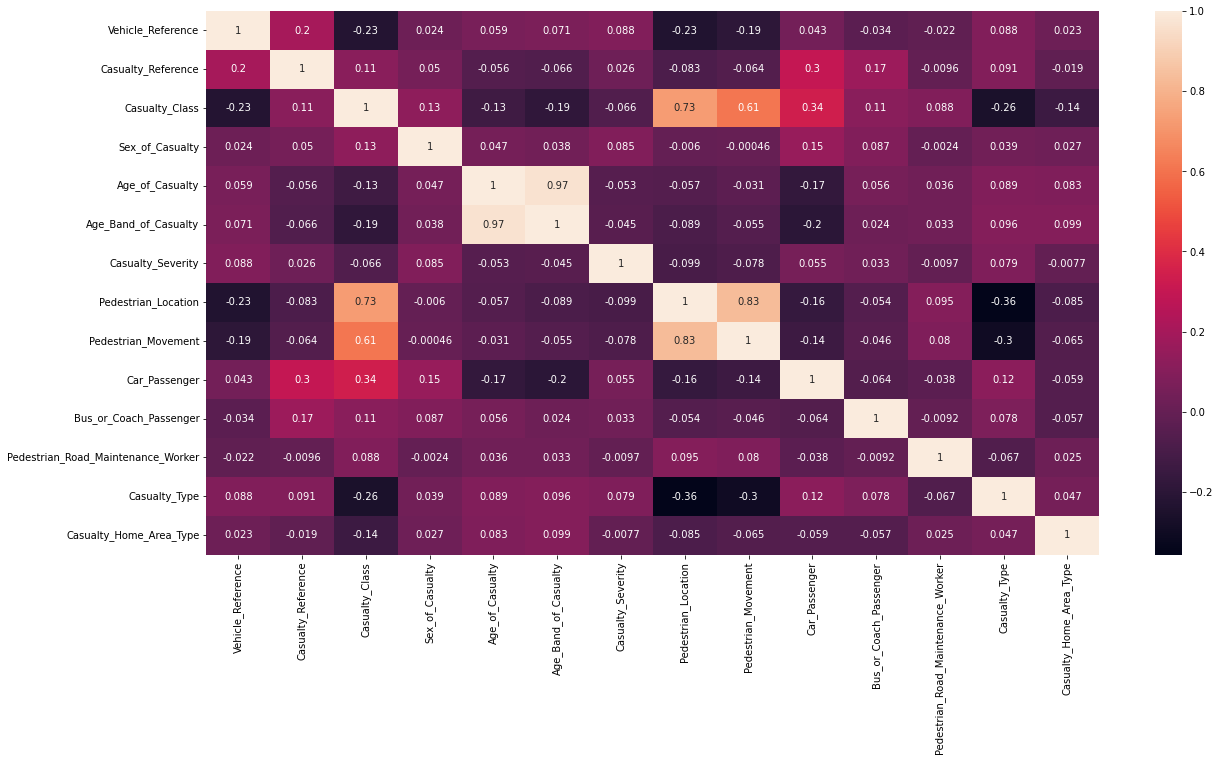

In [40]:
#correlation
casualties_corr = casualties.corr()
plt.figure(figsize=(20,10))
sns.heatmap(casualties_corr, annot=True)

<Figure size 432x288 with 0 Axes>

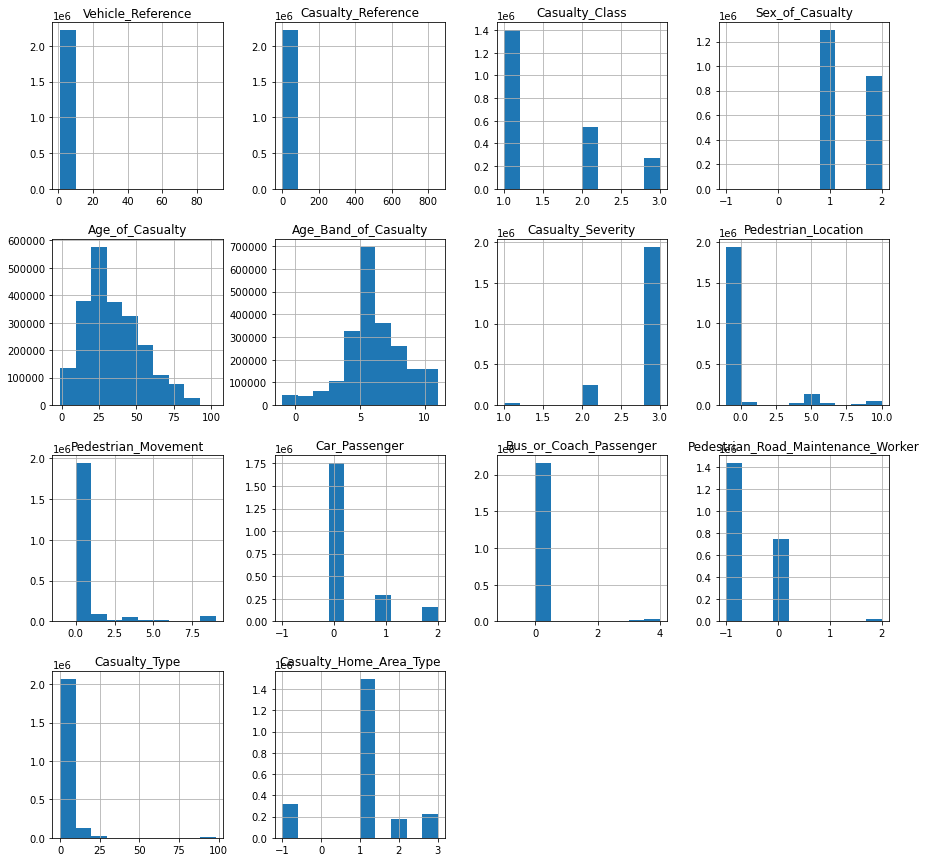

In [53]:
#Histograms
plt.figure()
casualties.hist(figsize=(15,15));

/Users/sabina/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


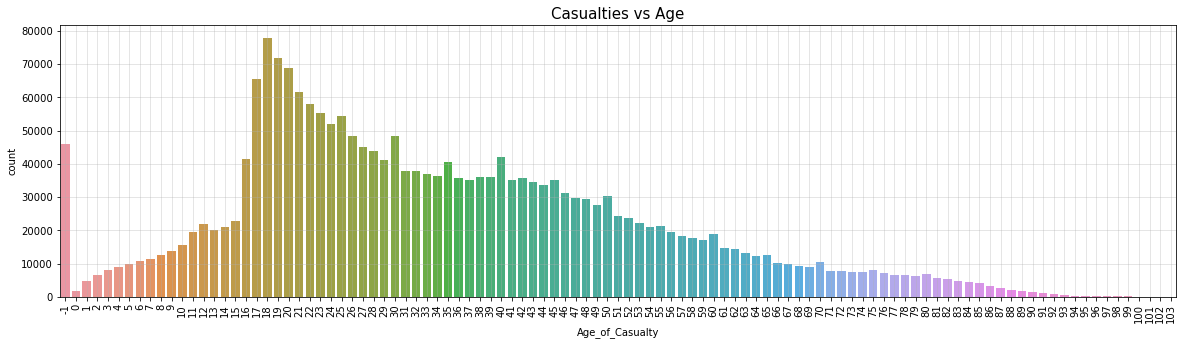

In [55]:
#Distrubution of casualties by age:

plt.figure(figsize=(20,5))
sns.countplot('Age_of_Casualty',data=casualties)
plt.title('Casualties vs Age', fontsize=15)
plt.xticks(rotation=90)
plt.grid(alpha=0.4)
plt.show()

#skewed to the right

/Users/sabina/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


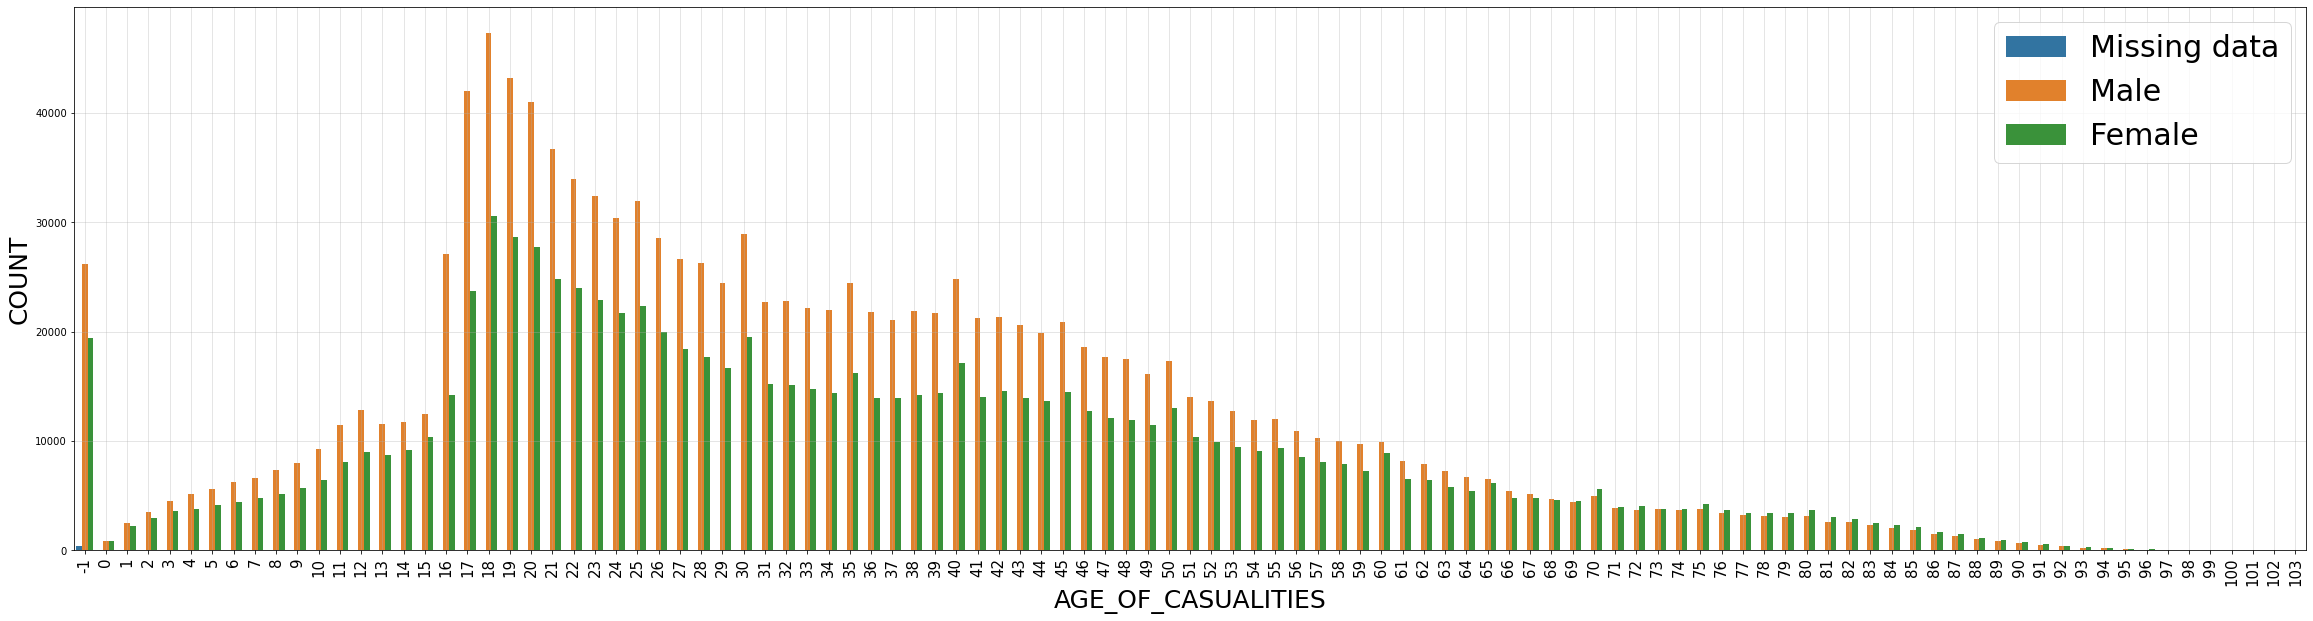

In [57]:
#Distrubution of casualties by age and gender:

plt.figure(figsize=(40,10))
sns.countplot('Age_of_Casualty',hue='Sex_of_Casualty',data=casualties)
plt.xticks(fontsize=15,rotation=90)
plt.legend(['Missing data','Male','Female'],prop={'size': 30}, loc=1)
plt.grid(alpha=0.4)
plt.xlabel('AGE_OF_CASUALITIES', fontsize=25)
plt.ylabel('COUNT', fontsize=25)
plt.show()

#more males

/Users/sabina/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


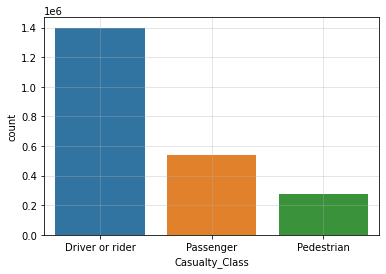

In [60]:
#Distribution of casualty class

plt.figure()
ax=sns.countplot('Casualty_Class', data=casualties)
ax.set_xticklabels(['Driver or rider','Passenger','Pedestrian'])
plt.grid(alpha=0.4)
plt.show()

#more drivers

## Accidents-Casualties

In [65]:
#merge datasets

df = accidents.merge(casualties, right_index=True, left_index=True)
df.head(10)

,Accident_Index_x,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,37,7,2,1,1,0,0,-1,0,1
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,37,7,3,0,0,0,4,-1,11,1
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,62,9,3,0,0,0,0,-1,9,1
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,30,6,3,5,2,0,0,-1,0,1
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,49,8,3,0,0,0,0,-1,3,-1
5,200501BS00006,524770.0,181160.0,-0.203238,51.515540,1,3,2,1,11/01/2005,...,30,6,3,0,0,0,0,-1,3,1
6,200501BS00007,524220.0,180830.0,-0.211277,51.512695,1,3,2,1,13/01/2005,...,31,6,3,0,0,0,0,-1,3,-1
7,200501BS00009,525890.0,179710.0,-0.187623,51.502260,1,3,1,2,14/01/2005,...,13,3,3,6,9,0,0,-1,0,1
8,200501BS00010,527350.0,177650.0,-0.167342,51.483420,1,3,2,2,15/01/2005,...,13,3,3,6,9,0,0,-1,0,1
9,200501BS00011,524550.0,180810.0,-0.206531,51.512443,1,3,2,5,15/01/2005,...,35,6,3,0,0,0,0,-1,9,1


In [66]:
df.columns

Index(['Accident_Index_x', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Accident_Index_y', 'Vehicle_Reference',
       'Casualty_Reference', 'Casualty_Class', 'Sex_of_Casualty',
       'Age_of_Casualty', 'Age_Band_of_Casualty', 'Casualty_Severity',
       'Pedestrian_Location

## Data exploration

/Users/sabina/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


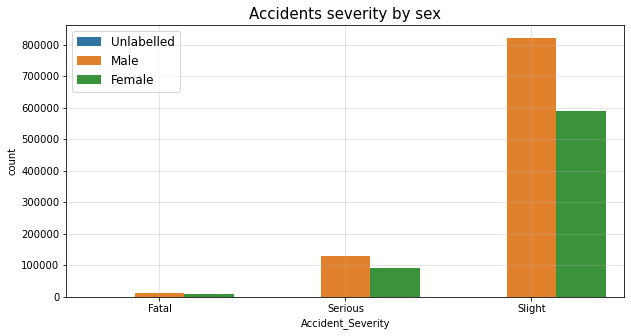

In [73]:
#Accidents severity by sex

plt.figure(figsize=(10,5))
ax=sns.countplot('Accident_Severity',hue='Sex_of_Casualty',data=df)
ax.set_xticklabels(['Fatal','Serious','Slight'])
plt.legend(['Unlabelled','Male','Female'],fontsize=12)
plt.title('Accidents severity by sex', fontsize=15)
plt.grid(alpha=0.4)

/Users/sabina/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


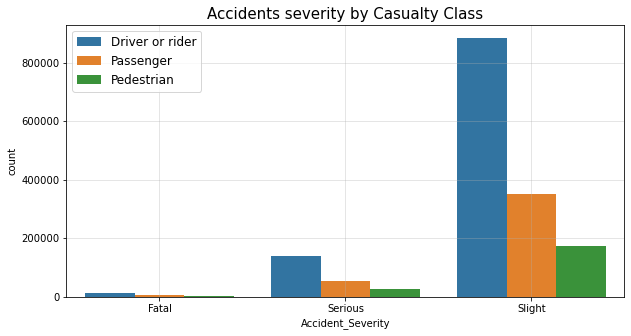

In [74]:
#Accidents severity by casualty class

plt.figure(figsize=(10,5))
ax=sns.countplot('Accident_Severity',hue='Casualty_Class',data=df)
plt.legend(['Driver or rider','Passenger','Pedestrian'],fontsize=12)
ax.set_xticklabels(['Fatal','Serious','Slight'])
plt.title('Accidents severity by Casualty Class', fontsize=15)
plt.grid(alpha=0.4)

/Users/sabina/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


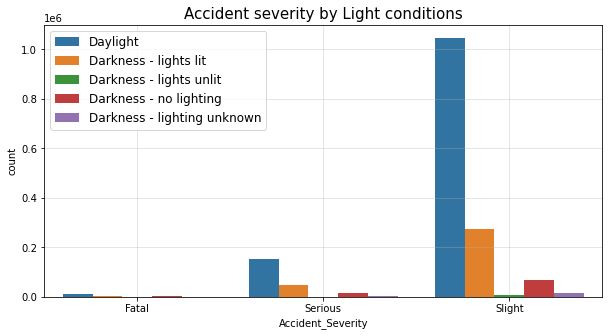

In [75]:
#Accidents severity by light conditions

plt.figure(figsize=(10,5))
ax=sns.countplot('Accident_Severity', hue='Light_Conditions', data=df)
plt.legend(['Daylight','Darkness - lights lit','Darkness - lights unlit','Darkness - no lighting','Darkness - lighting unknown'],fontsize=12)
ax.set_xticklabels(['Fatal','Serious','Slight'])
plt.title('Accident severity by Light conditions', fontsize=15)
plt.grid(alpha=0.4)

/Users/sabina/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


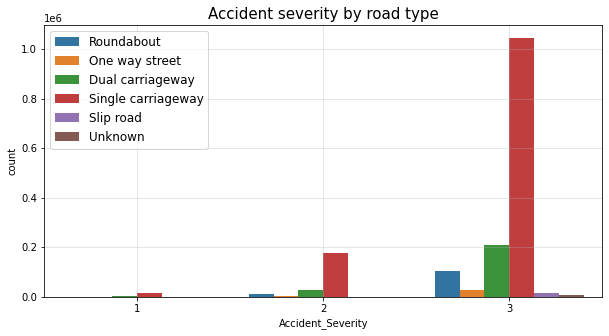

In [76]:
#Accidents severity by road type

plt.figure(figsize=(10,5))
sns.countplot('Accident_Severity', hue='Road_Type', data=df)
ax.set_xticklabels(['Fatal','Serious','Slight'])
plt.legend(['Roundabout','One way street','Dual carriageway','Single carriageway','Slip road','Unknown'], fontsize=12)
plt.title('Accident severity by road type', fontsize=15)
plt.grid(alpha=0.4)